In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# pip install yfinance --upgrade --no-cache-dir

In [3]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
df = yf.download('SPY', start='2024-01-01', end='2025-03-03')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


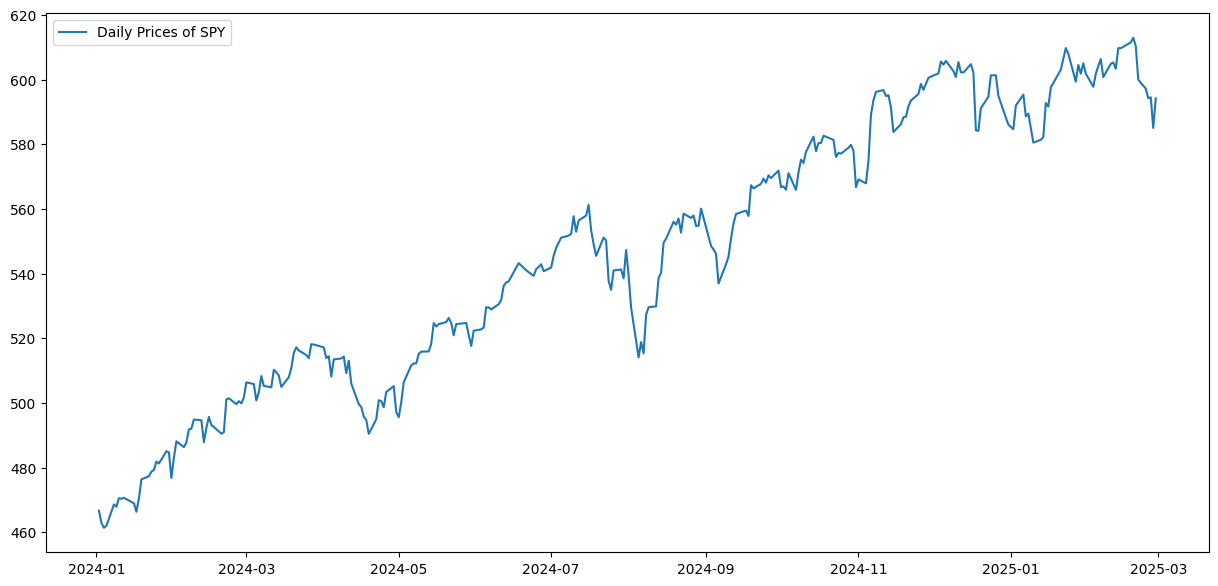

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df.index, df["Close"], label="Daily Prices of SPY")
plt.legend()
plt.show()

## Features

In [6]:
df['Ret'] = df['Close'].pct_change()

In [7]:
#geometric mean return
#last [10,20,30,40,50] days compounded return
df['Ret10_i'] = df['Ret'].rolling(10).apply(lambda x : 100 * ((np.prod(1+x)) ** (1/10)-1))
df['Ret20_i'] = df['Ret'].rolling(20).apply(lambda x : 100 * ((np.prod(1+x)) ** (1/20)-1))
df['Ret30_i'] = df['Ret'].rolling(30).apply(lambda x : 100 * ((np.prod(1+x)) ** (1/30)-1))
df['Ret40_i'] = df['Ret'].rolling(40).apply(lambda x : 100 * ((np.prod(1+x)) ** (1/40)-1))
df['Ret50_i'] = df['Ret'].rolling(50).apply(lambda x : 100 * ((np.prod(1+x)) ** (1/50)-1))

In [8]:
del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]

df = df.dropna()
df.tail(10)

Price,Ret,Ret10_i,Ret20_i,Ret30_i,Ret40_i,Ret50_i
Ticker,,,,,,
Date,,,,,,
2025-02-14,-0.000049,0.130171,0.150457,0.131789,0.020363,0.026735
2025-02-18,0.002936,0.227183,0.115118,0.149786,0.038018,0.031672
2025-02-19,0.002355,0.183756,0.081286,0.116163,0.119605,0.023993
2025-02-20,-0.004160,0.101485,0.032385,0.083086,0.109939,0.018948
2025-02-21,-0.017104,-0.105727,-0.081064,0.063460,0.036906,-0.019343
2025-02-24,-0.004550,-0.059416,-0.089243,0.043380,0.010572,-0.018139
2025-02-25,-0.004973,-0.176815,-0.042970,0.078066,-0.029522,-0.021882
2025-02-26,0.000505,-0.179367,-0.083200,0.074582,-0.028427,-0.036270


## Target Variable

In [9]:
df['Ret20'] = df['Ret20_i'].shift(-25)
df=df.dropna()
df.tail(10)

Price,Ret,Ret10_i,Ret20_i,Ret30_i,Ret40_i,Ret50_i,Ret20
Ticker,,,,,,,
Date,,,,,,,
2025-01-08,0.001461,-0.087787,-0.110347,-0.022666,-0.028223,0.042502,0.150457
2025-01-10,-0.015267,-0.351594,-0.171617,-0.085204,-0.069047,0.005549,0.115118
2025-01-13,0.001550,-0.336819,-0.202318,-0.097388,-0.057403,0.005413,0.081286
2025-01-14,0.001376,-0.217577,-0.169674,-0.082702,-0.055181,0.014224,0.032385
2025-01-15,0.018190,0.077254,-0.078661,-0.043281,0.005998,0.089912,-0.081064
2025-01-16,-0.001923,0.094465,-0.109562,-0.055661,0.033419,0.077628,-0.089243
2025-01-17,0.010040,0.219159,-0.039022,-0.023920,0.048177,0.101942,-0.042970
2025-01-21,0.009154,0.185952,0.157938,-0.014183,0.061842,0.096122,-0.083200


## Linear Regression

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_df = df.iloc[:, 0:-1]
Y_df = df.iloc[:, -1]

X = X_df.astype('float32')
Y = Y_df.astype('float32')

print(X.shape, Y.shape)

(216, 6) (216,)


In [11]:
reg = linear_model.LinearRegression().fit(X,Y)
reg.coef_

array([-0.05174211, -0.03614661,  0.0264374 ,  0.28546906, -0.6550366 ,
       -0.88598526], dtype=float32)

In [12]:
reg.intercept_

0.19419287

## R^2

In [13]:
reg.score(X,Y)

0.3375362361901204

In [14]:
# making prediction
y_pred = reg.predict(X)
print('Coefficient: \n', reg.coef_)
print('Mean Square Error: %.5f' % mean_squared_error(Y,y_pred))
print('Coeffcient of determination (R2): %.5f'% r2_score(Y, y_pred))

Coefficient: 
 [-0.05174211 -0.03614661  0.0264374   0.28546906 -0.6550366  -0.88598526]
Mean Square Error: 0.01264
Coeffcient of determination (R2): 0.33754


R2(0.33754) means that 33.75% of the variation in the target variable Y is explained by the model.
The remaining 66.25% of the variation is not explained, meaning the model has a lot of unexplained variance.
Since R2 ranges from 0 to 1, 0.33754 is relatively low, indicating a weak model fit.

0.01264 means that, on average, the squared prediction errors are small, but MSE alone does not tell if the model is good.

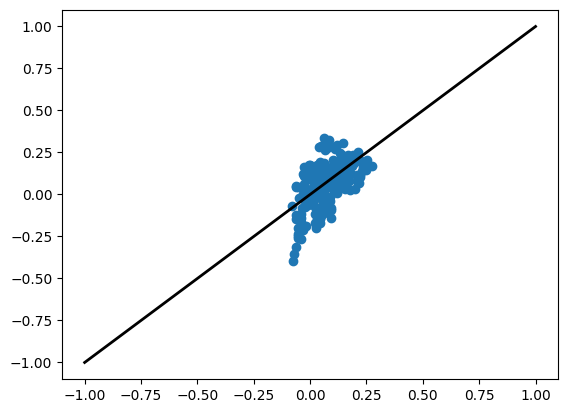

In [15]:
plt.scatter(y_pred, Y)
plt.plot([-1, 1], [-1, 1], color="black", linewidth=2)
plt.show()

## Out of Sample Vs In Sample Performance

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=int(len(Y) * 0.2), shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(173, 6) (43, 6) (173,) (43,)


In [17]:
reg = linear_model.LinearRegression().fit(X_train,y_train)

In [18]:
y_pred = reg.predict(X_train)

print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.5f" % mean_squared_error(y_train, y_pred))
print("Coefficient of determination (R2): %.5f" % r2_score(y_train, y_pred))

Coefficients: 
 [ 0.02265806 -0.04078856  0.11808617  0.12875609 -0.7102786  -0.79370934]
Mean squared error: 0.01120
Coefficient of determination (R2): 0.40365


In [19]:
y_pred_test = reg.predict(X_test)
print("Coefficients: \n", reg.coef_)
print("Mean squared error (out-of-sample): %.5f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination (R2 out-of-sample): %.5f"% r2_score(y_test, y_pred_test))

Coefficients: 
 [ 0.02265806 -0.04078856  0.11808617  0.12875609 -0.7102786  -0.79370934]
Mean squared error (out-of-sample): 0.02119
Coefficient of determination (R2 out-of-sample): -0.42644


Negative R2 means the model is performing worse than just predicting the mean of the target variable.

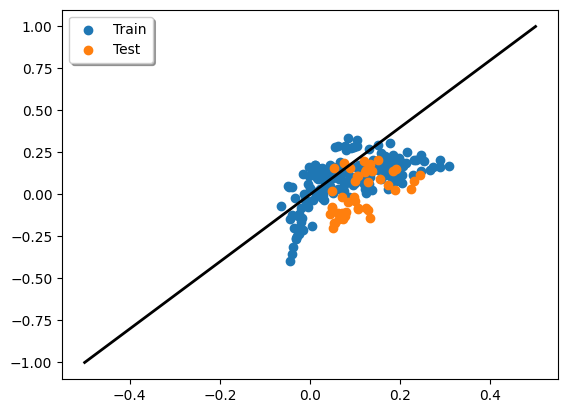

In [20]:
plt.scatter(y_pred, y_train, label="Train")
plt.scatter(y_pred_test, y_test, label="Test")
plt.plot([-0.5, 0.5], [-1, 1], color="black", linewidth=2)
legend = plt.legend(loc="upper left", shadow=True)
plt.show()

## Polynomial Regression

In [21]:
X = X_df.astype('float32')
Y = Y_df.astype('float32')

print(X.shape, Y.shape)

(216, 6) (216,)


In [22]:
Xpoly = X
for pp in range(2,5):
    Xpoly = np.concatenate((Xpoly, np.power(X, pp)), axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(Xpoly, Y, test_size=int(len(Y) * 0.2), shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(173, 24) (43, 24) (173,) (43,)


In [24]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

# Making predictions in the training sample
y_pred = reg.predict(X_train)

print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.5f" % mean_squared_error(y_train, y_pred))
print("Coefficient of determination (R2): %.5f" % r2_score(y_train, y_pred))

Coefficients: 
 [ 3.5798602e-04 -1.7007557e-01  1.5241636e-01 -9.1685462e-01
  7.4520159e-01 -2.8863881e+00 -1.2159790e+02 -7.0079699e-02
 -4.4087315e-01  3.6508977e+00  3.1212673e+00  1.0466469e+02
  4.9106558e+03  1.7104970e-02  3.9310715e+00  1.8253897e+01
 -1.3440253e+02 -8.8616608e+02  1.5234319e+00  1.6326947e-02
 -4.6796846e+00 -5.9428959e+01  3.8985303e+02  2.0856284e+03]
Mean squared error: 0.00588
Coefficient of determination (R2): 0.68671


In [25]:
y_pred_test = reg.predict(X_test)

print("Coefficients: \n", reg.coef_)
print("Mean squared error (out-of-sample): %.5f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination (R2 out-of-sample): %.5f" % r2_score(y_test, y_pred_test))

Coefficients: 
 [ 3.5798602e-04 -1.7007557e-01  1.5241636e-01 -9.1685462e-01
  7.4520159e-01 -2.8863881e+00 -1.2159790e+02 -7.0079699e-02
 -4.4087315e-01  3.6508977e+00  3.1212673e+00  1.0466469e+02
  4.9106558e+03  1.7104970e-02  3.9310715e+00  1.8253897e+01
 -1.3440253e+02 -8.8616608e+02  1.5234319e+00  1.6326947e-02
 -4.6796846e+00 -5.9428959e+01  3.8985303e+02  2.0856284e+03]
Mean squared error (out-of-sample): 0.04424
Coefficient of determination (R2 out-of-sample): -1.97762


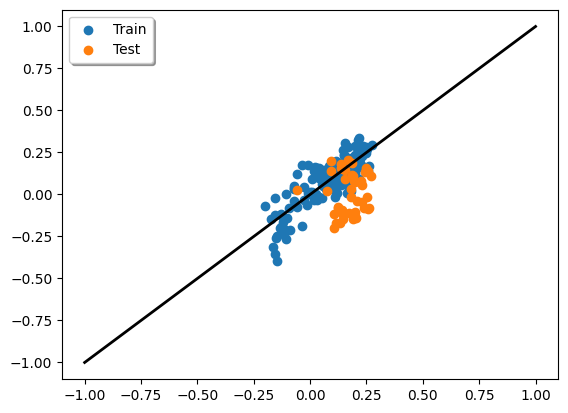

In [26]:
plt.scatter(y_pred, y_train, label="Train")
plt.scatter(y_pred_test, y_test, label="Test")
plt.plot([-1, 1], [-1, 1], color="black", linewidth=2)
legend = plt.legend(loc="upper left", shadow=True)
plt.show()

Negative R2 means the model is worse than simply predicting the mean of 𝑌
This is a very bad sign because it indicates that the polynomial regression is overfitting the training data but generalizing poorly to new data.